## <font color=red> Who survived when the Titanic sank? An example for exploratory data analysis</font>

More info on the sinking of the Titanic in [Encyclopedia Titanica](http://www.encyclopedia-titanica.org) or Wikipedia

In [1]:
# Import code libraries or "modules" in Python lingo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import sys
# from IPython.core.debugger import Tracer
from datascience import *
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Import some new methods for class Table
# Add IDS directory to search path
course_dir = "/Users/wxs/Dropbox/IDS/Git-reps/STAT180/"
computing_dir = course_dir + "Computing"

if computing_dir not in sys.path:
    sys.path.append(computing_dir)

from datascience_extensions import *

In [3]:
# Reload the extensions after we make a change
# Importing it again does not work - a module is imported only once
module_name = "datascience_extensions"
importlib.reload(sys.modules[module_name])

<module 'datascience_extensions' from '/Users/wxs/Dropbox/IDS/Git-reps/STAT180/Lectures/datascience_extensions.py'>

In [4]:
# Read the data into a table titanic and display the first 3 rows
# data_dir = course_dir + "Data/"
# titanic_filename = "titanic3.csv"
# titanic_pathname = data_dir + titanic_filename
# titanic = Table.read_table(titanic_pathname)
# titanic.take([0, 1, 2])

In [5]:
titanic = Table.read_table("https://github.com/wstuetzle/STAT180/raw/master/Data/titanic3.csv")
titanic.show(3)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,nan,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


#### Rows of the table correspond to passengers. Columns correspond to properties (or "features") of passengers:


#### We often refer to the rows as "cases" and to the columns as "variables"
#### Some entries in the table are "nan", indicating that the value is missing

In [6]:
# Let's see how big the table is
titanic.shape()

[1310, 14]

In [7]:
# So the table "titanic" has 1,310 rows, numbered 0..1309
# The spreadsheet "titanic3.csv" has also 1,310 rows, but row 1 contains 
# the column labels. So we only have data on 1,309 passengers.
#Something is amiss. Let's look at the first row of the table

titanic.take(0)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,nan,"St Louis, MO"


In [8]:
# That's correct. Look at the last row

titanic.take(1309)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
# So Table.read_table has read an empty row. Let's get rid of that

titanic = titanic.take(np.arange(1309))
titanic.take(1308)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,nan,S,nan,nan,nan


In [10]:
# Complication:
# There are missing values (nan) in the table. 
# We have to keep that in mind when we do our analysis.
# 
# Let's count the missing values for each variable
nan_count = titanic.count_nan()
nan_count

{'age': 263,
 'boat': 823,
 'body': 1188,
 'cabin': 1014,
 'embarked': 2,
 'fare': 1,
 'home.dest': 564,
 'name': 0,
 'parch': 0,
 'pclass': 0,
 'sex': 0,
 'sibsp': 0,
 'survived': 0,
 'ticket': 0}

### Let's first get a feeling on the composition of passengers: age, sex, port of embarkation. We could also look at family relationships using the same tools, but we'll skip that.

sex,count
female,466
male,843


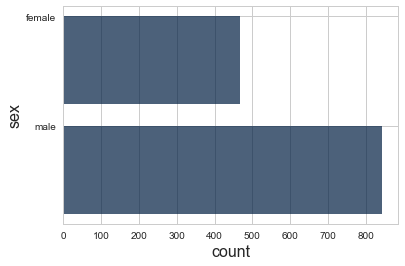

In [11]:
bla = titanic.group("sex")
bla.barh("sex")
bla
# About 2/3 of the passengers were males

pclass,count
1,323
2,277
3,709


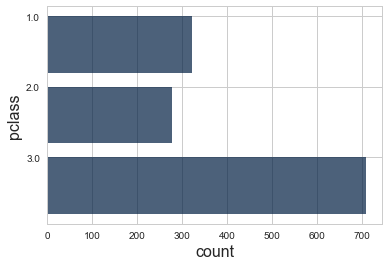

In [12]:
bla = titanic.group("pclass")
bla.barh("pclass")
bla
# About half the passengers were in 3rd class

embarked,count
C,270
Q,123
S,914
nan,2


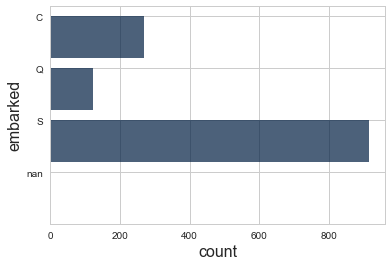

In [13]:
bla = titanic.group("embarked")
bla.barh("embarked")
bla
# Most assengers embarked in Southampton
# Note that there are two missing values
# Let's see if there is a difference in the class distribution
# between the ports of embarkation


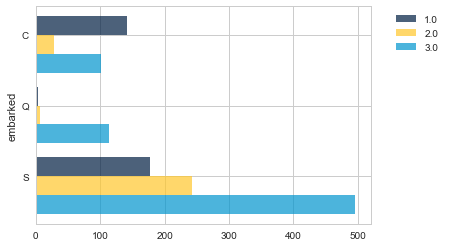

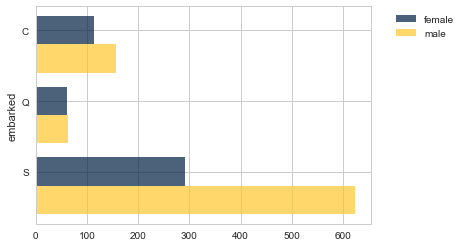

In [14]:
# Let's see if there is a difference in the class and sex distribution
# between the ports of embarkation
titanic_sub = titanic.select("pclass", "embarked", "sex").take_complete_rows()
titanic_sub.pivot("pclass", "embarked").barh("embarked")
titanic_sub.pivot("sex", "embarked").barh("embarked")
# Drastic differences betweeb embarkation ports

569

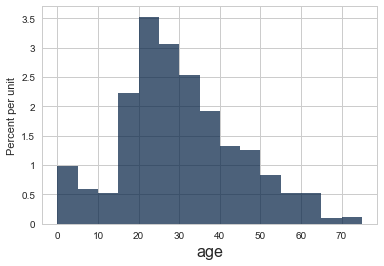

In [15]:
age = titanic.select("age").take_complete_rows()
age.hist(bins=np.arange(0, 80, 5))
age.where("age", are.below(30)).num_rows
# Almost half the passengers are younger than 30

In [16]:
np.mean(age.column("age"))
# Mean age is just below 30

29.8811345124283

In [17]:
np.median(age.column("age"))
# Median age is 28

28.0

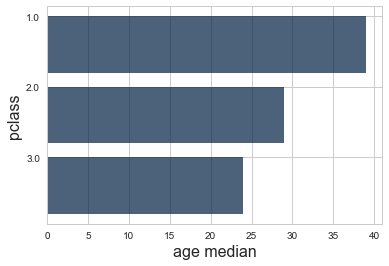

In [18]:
# Maybe the young passengers are poor emigrants who are
# predominantly in 3rd class
age_pclass = titanic.select("age", "pclass").take_complete_rows()
# age_pclass.shape()
age_pclass.group("pclass", np.median).barh("pclass")
# Yes, the 3rd class passsengers are on average much younger
# than the 1st class passengers

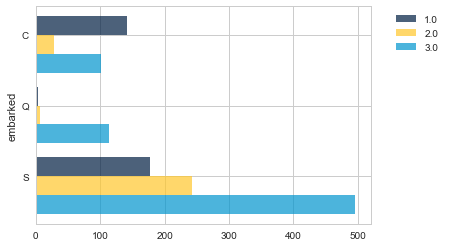

In [19]:
# Let's see if there is a difference in the class distribution
# between the ports of embarkation
titanic_sub = titanic.select("pclass", "embarked", "sex").take_complete_rows()
titanic_sub.pivot("pclass", "embarked").barh("embarked")
# Dramatic difference.

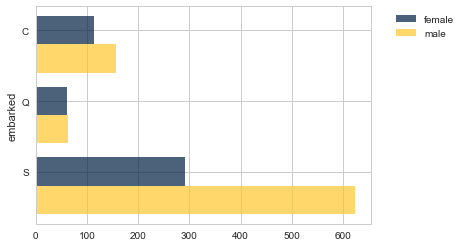

In [20]:
# How about gender?
titanic_sub.pivot("sex", "embarked").barh("embarked")
# Conjecture: The passengers embarking at Queenstown
# tended to be young emigrant families?

survived,count
0,809
1,500


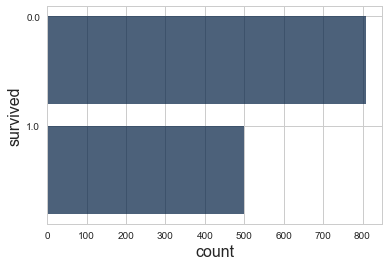

In [21]:
bla = titanic.group("survived")
bla.barh("survived")
bla
# About 40% of passengers survived

##  Let's no get to the most interesting question: How did the likelihood of survival "depend" on sex and pclass

pclass,female,male
1,144,179
2,106,171
3,216,493


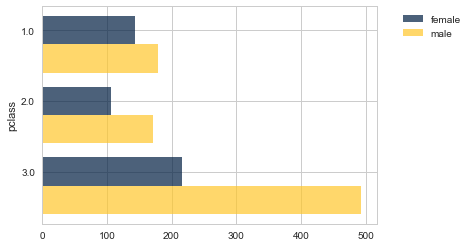

In [22]:
# Let's no get to the most intersting question: How did the likelihood
# of survival "depend" on sex and pclass
titanic.pivot("sex", "pclass").barh("pclass")
titanic.pivot("sex", "pclass")
# Ratio of females to males is decreasing function of pclass

pclass,female,male
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.15213


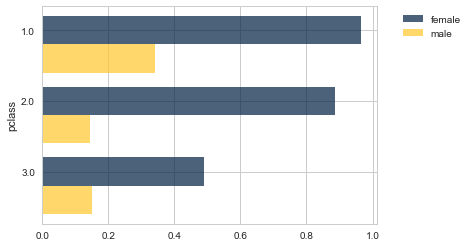

In [23]:
titanic.pivot("sex", "pclass", "survived", collect=np.mean).barh("pclass")
titanic.pivot("sex", "pclass", "survived", collect=np.mean)
# Males in first class were twice as likely to survive as males in 2nd
# and 3rd class
# Females were roughly equally likely to survice in 1st and 2nd class
# and twice as likely to survice as females in 3rd class

pclass,female,male
1,0.0347222,0.659218
2,0.113208,0.853801
3,0.509259,0.84787


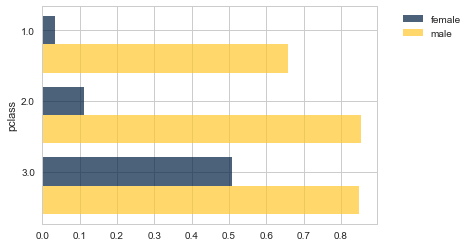

In [24]:
# Of course we could also state the result in terms of death rather than 
# survival
died = 1 - titanic.column("survived")
titanic_extended = titanic.with_columns("died", died)
titanic_extended.pivot("sex", "pclass", "died", collect=np.mean).barh("pclass")
titanic_extended.pivot("sex", "pclass", "died", collect=np.mean)
# Females in 2nd class were three times as likely to die as females in 1st 
# class. Females in 3rd class were 15 times more likely to die as females
# in 1st class